In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/dry-beans-classification-iti-ai-pro-intake01/sample_submission.csv
/kaggle/input/dry-beans-classification-iti-ai-pro-intake01/train.csv
/kaggle/input/dry-beans-classification-iti-ai-pro-intake01/test.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [3]:
from sklearn.preprocessing import LabelEncoder, PowerTransformer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, make_scorer, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [4]:
train_df = pd.read_csv('/kaggle/input/dry-beans-classification-iti-ai-pro-intake01/train.csv')

In [5]:
X = train_df.drop(columns=['ID', 'y'])
y = train_df.y

In [6]:
pt = PowerTransformer()

data = ['Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4']

pt.fit(X[data])

transformed_data = pt.transform(X[data])

X[data] = transformed_data

/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


In [7]:
def plot_confusion_matrix(clf, true_values, predicted_values):
    plt.figure(figsize = (8, 7))
    sns.heatmap(confusion_matrix(true_values, predicted_values),
                annot = True,
                fmt = ".0f",
                cmap = "coolwarm",
                linewidths = 2, 
                linecolor = "white",
                xticklabels = clf.classes_,
                yticklabels = clf.classes_)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title("Confusion matrix on the testing data")
    plt.show()

In [8]:
def plot_heat_map(df):
    plt.figure(figsize=(16, 6))
    heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
    heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

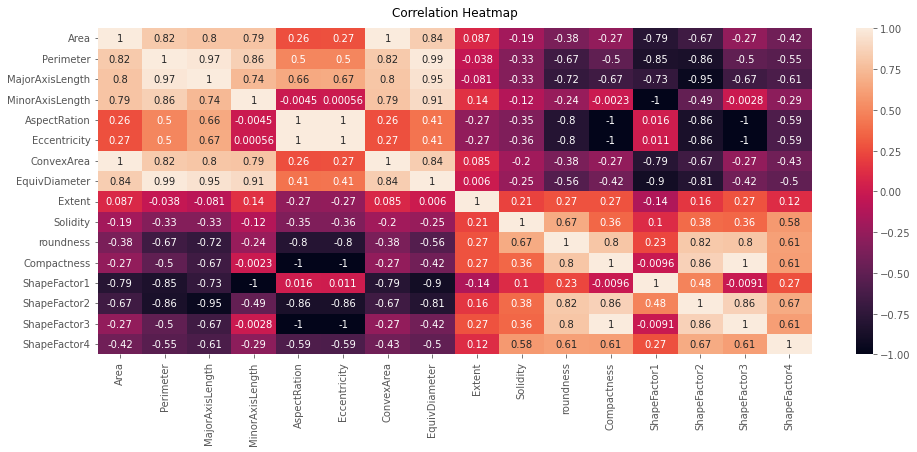

In [9]:
plot_heat_map(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 1)

le = LabelEncoder()
le.fit(y_train)

train_labels = le.transform(y_train)
val_labels = le.transform(y_test)

# columns = [, 'Extent', 'Solidity', 'roundness', 'ShapeFactor4']
# X_train = X_train[columns]
# X_test = X_test[columns]

columns=['Area']
X_train.drop(columns=columns, inplace=True)
X_test.drop(columns=columns, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4908: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Training Accuarcy =  0.9248318607411314
Validation Accuarcy =  0.9252537680713626


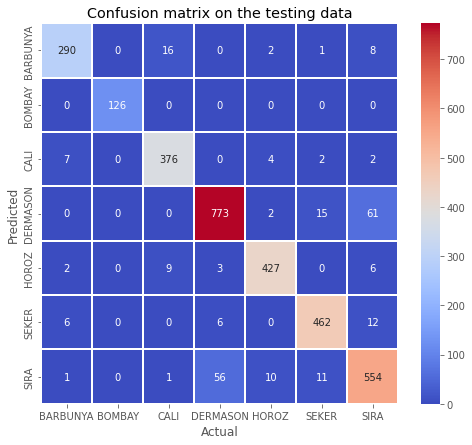

In [11]:
param_dist = {'multi_class': 'multinomial', 'random_state': 1, 'solver': 'newton-cg', 'penalty': 'l2'}

clf = LogisticRegression(**param_dist)

pipe = Pipeline(steps=[('scaler', StandardScaler()), ('clf', clf)])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_train)
print('Training Accuarcy = ', f1_score(y_train, y_pred, average='micro'))

y_pred = pipe.predict(X_test)
print('Validation Accuarcy = ', f1_score(y_test, y_pred, average='micro'))

plot_confusion_matrix(pipe, y_test, y_pred)

In [12]:
y_transformed = le.transform(y)

/opt/conda/lib/python3.7/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/lib/python3.7/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


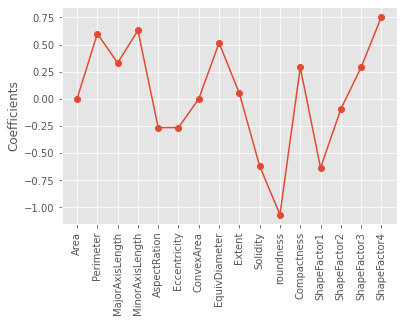

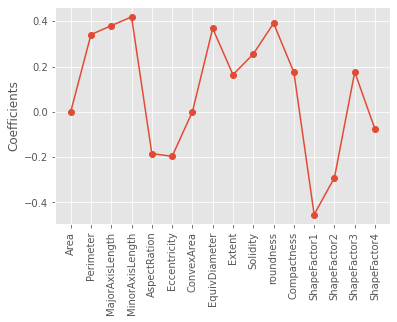

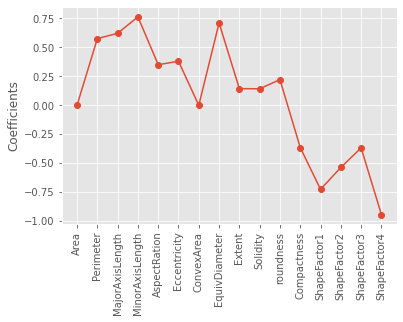

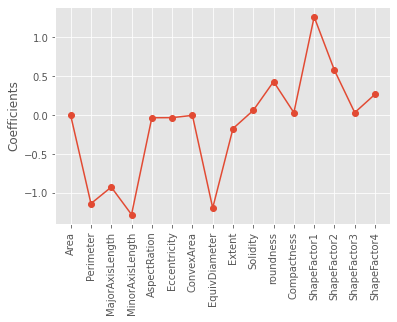

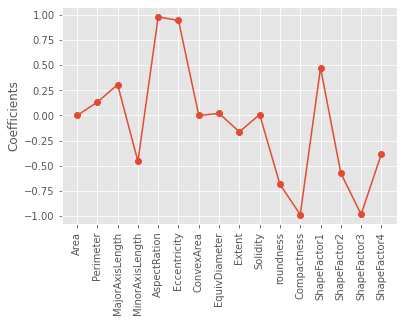

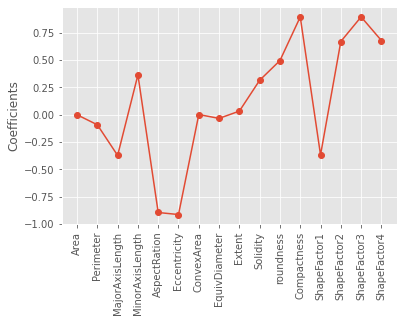

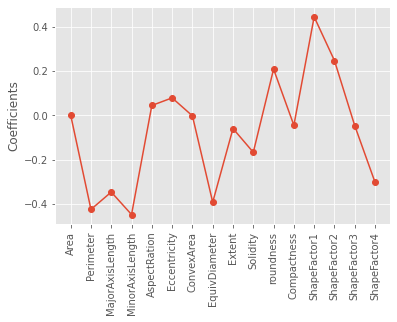

In [13]:
lr = LogisticRegression(**param_dist)
lr_coef = lr.fit(X, y_transformed).coef_
for i in range(len(lr_coef)):
    plt.plot(range(len(X.columns)), lr_coef[i], marker='o')
    plt.xticks(range(len(X.columns)), X.columns, rotation=90)
    plt.ylabel('Coefficients')
    plt.show()